# Color Normalization

Click to open in:  \[[GitHub](https://github.com/DIDSR/wsi_processing_toolbox/03_patch_extraction.ipynb)\]

Developer: Tanviben.Patel@fda.hhs.gov and Seyed.kahaki@fda.hhs.gov

## Color Normalization Demo
This demonstration guides you through the process of using WSIToolbox to do color normalization on extracted patches. This feature enabled using the color_normalization method.

## Environment Configuration
Please follow the instruction provided in the Installation section to install related dependencies. If this isn't your first time running this code and you have all these packages installed, you can skip to the next step. If you choose to run it regardless, you might encounter an error message; however, this won't negatively impact your session. On Jupyter Notebook, this cell is responsible for installing required packages for color normalization module. If you haven’t installed the packages based on the instruction provided for the WSI Reader module, please install these packages as well

In [5]:
# to check the python version
from platform import python_version
print(python_version())
#pip install mpmath==1.2.1
#pip install lxml==4.9.1
#!apt-get -y install libopenjp2-7-dev libopenjp2-tools openslide-tools | tail --line 1
#pip install cv2== 4.5.3
#pip install openslide-python==1.1.2
#pip install Shapely==1.7.1
#pip install tifffile==2022.10.10
#pip install random
#pip install glob
print("Installation is done.")

3.12.5
Installation is done.


## Color Normalization Process
In this demonstration, we show you how to normalize image colors in Whole Slide Images (WSIs) using different stain normalization methods. This is achieved using the WSIToolbox's color normalization classes such as MacenkoNormalizer, VahadaneNormalizer, ReinhardNormalizer, and HistogramNormalizer.

Color normalization is essential when dealing with histopathological images, as variations in staining intensity can affect downstream analysis. This step should be performed after extracting image patches from WSIs. If you haven't extracted patches yet, please follow the steps in this Notebook.

Once the image patches are extracted, you can apply color normalization using one of the methods provided. Before proceeding, ensure you have imported the required normalizers using: from WSI.color_normalization import MacenkoNormalizer, VahadaneNormalizer, ReinhardNormalizer, HistogramNormalizer. Now, to apply color normalization to a set of image patches, follow the steps below:

In [6]:
#pip install --upgrade ipywidgets

In [7]:
#pip install shapely

# Import necessary libraraies

In [2]:
import os
import cv2 as cv
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from WSI.color_normalization import color_normalization


# Image Loading, Display, and Color Normalization Pipeline

In [3]:
# Manual user input with fallback
input_folder = input("Enter input folder (e.g., ./data/images/Imagepatches/CMU-1-Small-Region/): ") or "./data/images/Imagepatches/CMU-1-Small-Region/"
output_folder = input("Enter output folder (e.g., ./data/normalized_images/Histogram): ") or "./data/normalized_images/Histogram"
target_image_path = input("Enter target image path (e.g., ./data/images/ReferenceImage/TCGA-A7-A13E-01Z-00-DX1.png): ") or "./data/images/ReferenceImage/TCGA-A7-A13E-01Z-00-DX1.png"
method = input("Choose normalization method (Macenko, Vahadane, Reinhard, Histogram): ") or "Macenko"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

Enter input folder (e.g., ./data/images/Imagepatches/CMU-1-Small-Region/):  ./data/images/Imagepatches/CMU-1-Small-Region/
Enter output folder (e.g., ./data/normalized_images/Histogram):  ./data/normalized_images/Histogram
Enter target image path (e.g., ./data/images/ReferenceImage/TCGA-A7-A13E-01Z-00-DX1.png):  ./data/images/ReferenceImage/TCGA-A7-A13E-01Z-00-DX1.png
Choose normalization method (Macenko, Vahadane, Reinhard, Histogram):  Histogram


In [4]:
# Initialize the normalizer
normalizer = color_normalization()

In [5]:
# Get image list
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif'))]

if not image_files:
    raise ValueError(" No valid image files found in the input directory.")

print(f" Running {method} normalization on {len(image_files)} images...\n")

 Running Histogram normalization on 49 images...



Processing source image: ./data/images/Imagepatches/CMU-1-Small-Region/2_CMU-1-Small-Region_x_1065_y_2154_a_100.00.png
 Example 1: 2_CMU-1-Small-Region_x_1065_y_2154_a_100.00.png


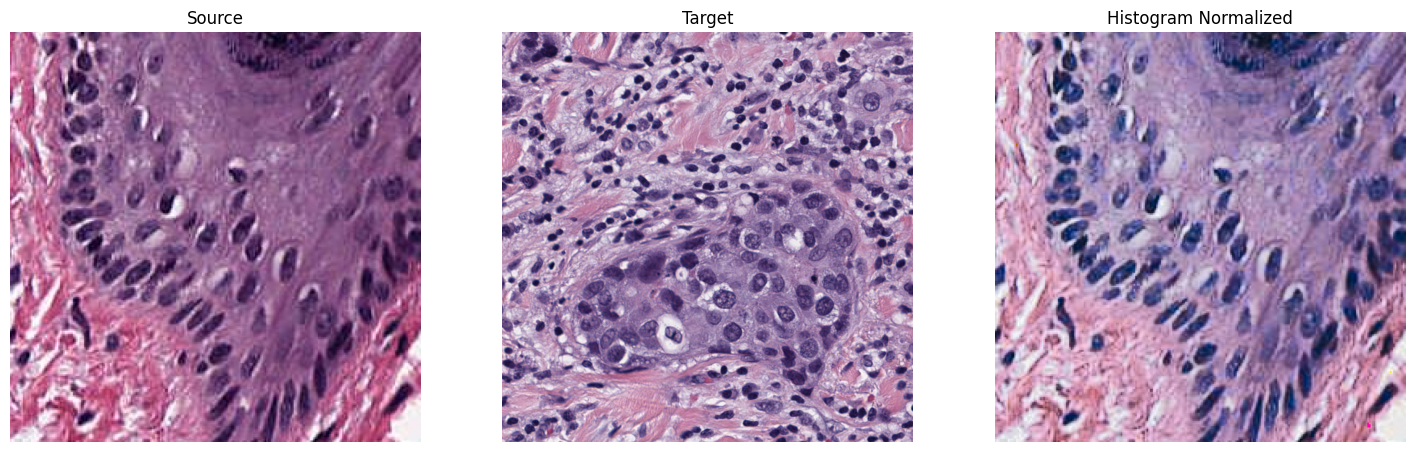

Processing source image: ./data/images/Imagepatches/CMU-1-Small-Region/5_CMU-1-Small-Region_x_1059_y_2060_a_100.00.png
 Example 2: 5_CMU-1-Small-Region_x_1059_y_2060_a_100.00.png


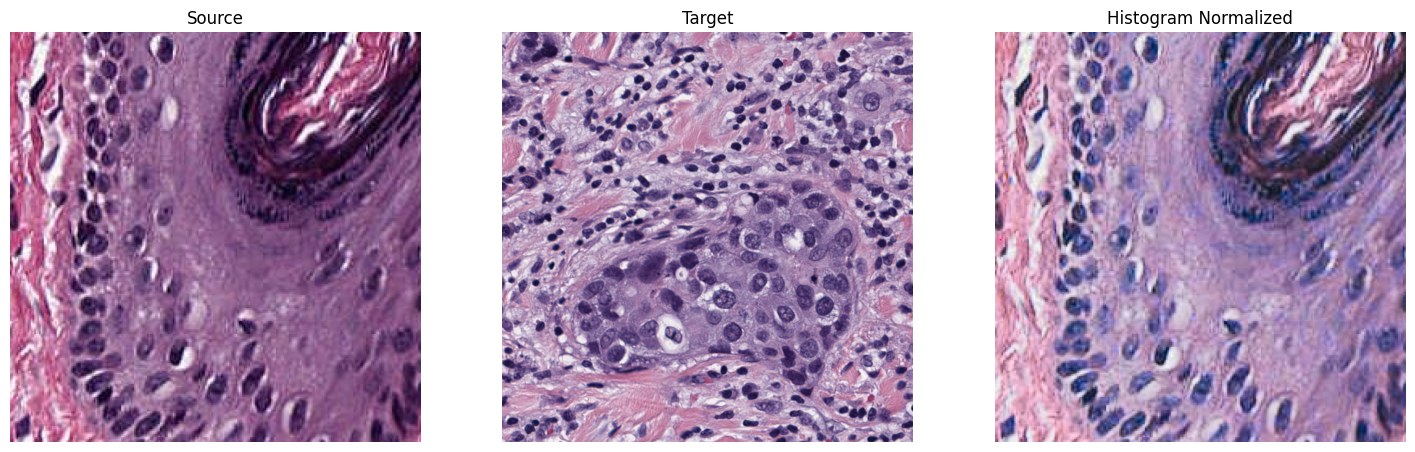

Processing source image: ./data/images/Imagepatches/CMU-1-Small-Region/0_CMU-1-Small-Region_x_900_y_1849_a_100.00.png
 Example 3: 0_CMU-1-Small-Region_x_900_y_1849_a_100.00.png


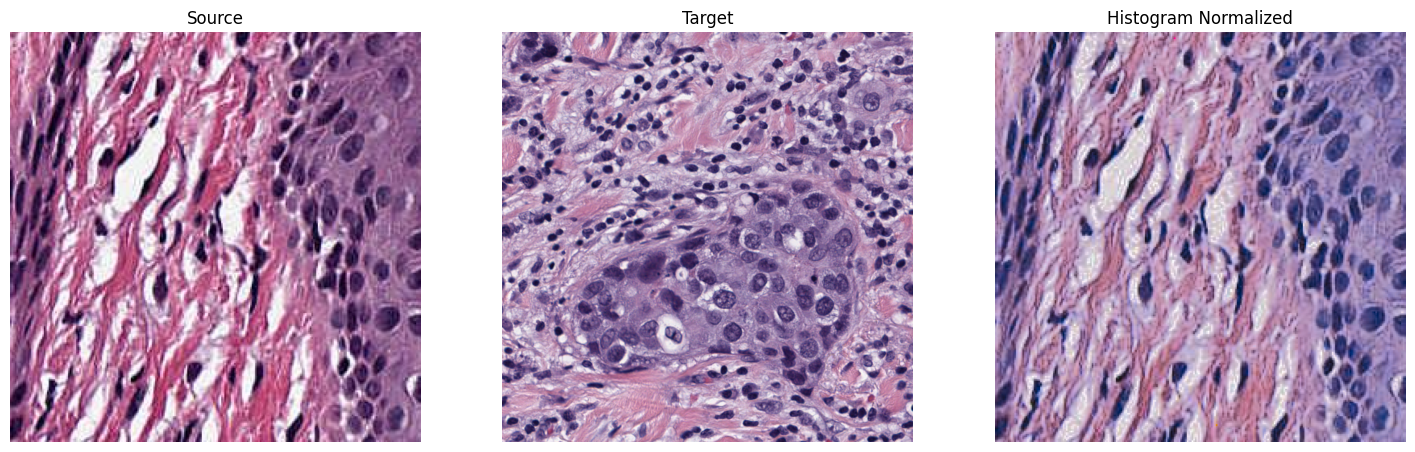

Processing source image: ./data/images/Imagepatches/CMU-1-Small-Region/4_CMU-1-Small-Region_x_1043_y_2411_a_100.00.png
 4_CMU-1-Small-Region_x_1043_y_2411_a_100.00.png normalized and saved.
Processing source image: ./data/images/Imagepatches/CMU-1-Small-Region/0_CMU-1-Small-Region_x_1187_y_2488_a_100.00.png
 0_CMU-1-Small-Region_x_1187_y_2488_a_100.00.png normalized and saved.
Processing source image: ./data/images/Imagepatches/CMU-1-Small-Region/2_CMU-1-Small-Region_x_1054_y_2295_a_100.00.png
 2_CMU-1-Small-Region_x_1054_y_2295_a_100.00.png normalized and saved.
Processing source image: ./data/images/Imagepatches/CMU-1-Small-Region/9_CMU-1-Small-Region_x_1037_y_2427_a_100.00.png
 9_CMU-1-Small-Region_x_1037_y_2427_a_100.00.png normalized and saved.
Processing source image: ./data/images/Imagepatches/CMU-1-Small-Region/6_CMU-1-Small-Region_x_945_y_2251_a_100.00.png
 6_CMU-1-Small-Region_x_945_y_2251_a_100.00.png normalized and saved.
Processing source image: ./data/images/Imagepatches/

In [6]:
# Process each image
for i, img_file in enumerate(image_files):
    src_path = os.path.join(input_folder, img_file)

    source_img, target_img, normalized_img = normalizer.process_single_image(
        source_image_path=src_path,
        target_image_path=target_image_path,
        method=method
    )

    if normalized_img is not None:
        out_path = os.path.join(output_folder, img_file)
        cv.imwrite(out_path, cv.cvtColor(normalized_img, cv.COLOR_RGB2BGR))

        if i < 3:
            # Show side-by-side comparison
            print(f" Example {i + 1}: {img_file}")
            normalizer.plot_images(source_img, target_img, normalized_img,
                                   source_title="Source",
                                   target_title="Target",
                                   normalized_title=f"{method} Normalized")
        else:
            print(f" {img_file} normalized and saved.")
    else:
        print(f" Skipped: {img_file}")

Plotting Histogram normalization results on 49 images, showing before-and-after comparisons of mean hue vs. mean saturation and standard deviation of hue vs. saturation.

Target image loaded. Mean Hue/Sat: (0.5592489, 0.2758738)


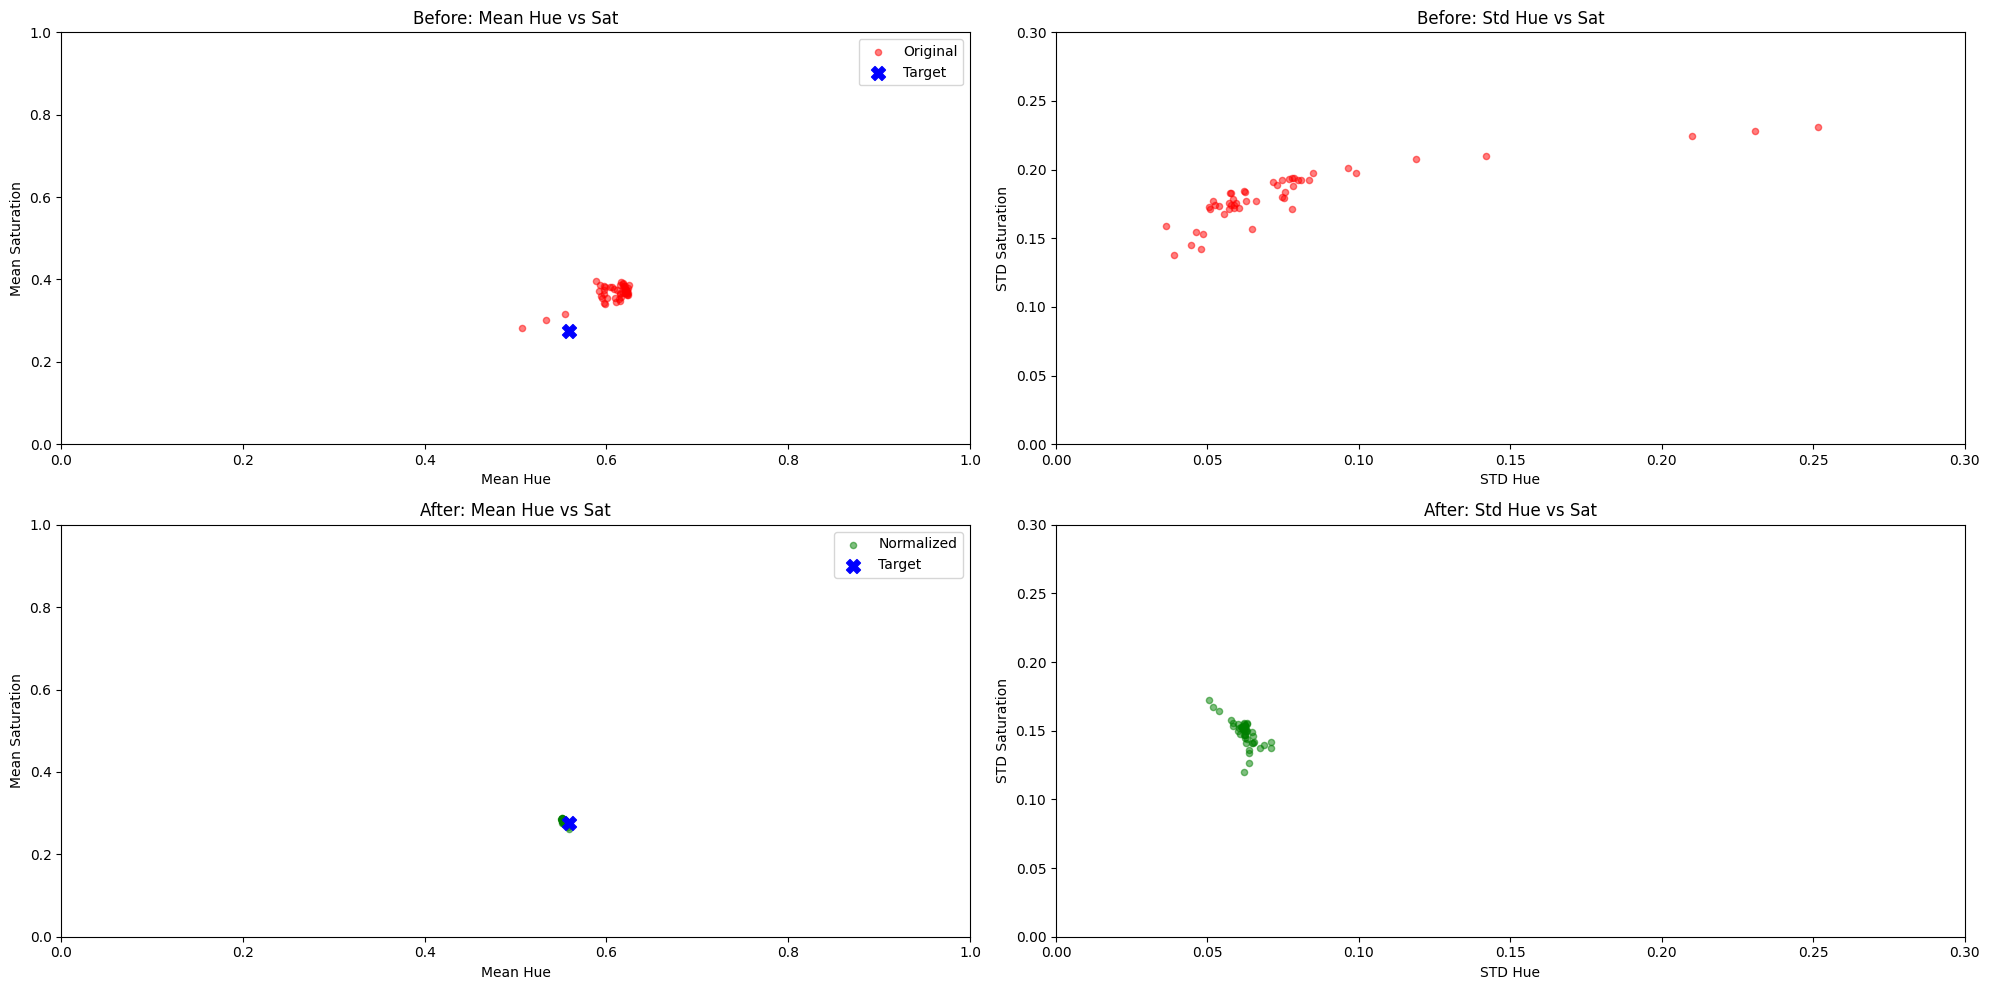

In [7]:
# Load images before and after normalization
original_images, _ = color_normalization.load_images_from_folder(input_folder)
normalized_images, _ = color_normalization.load_images_from_folder(output_folder)

# Compute stats
original_stats = color_normalization.compute_hue_saturation_stats(original_images)
normalized_stats = color_normalization.compute_hue_saturation_stats(normalized_images)

# Plot scatter grid
print(f"Plotting {method} normalization results on {len(image_files)} images, showing before-and-after comparisons of mean hue vs. mean saturation and standard deviation of hue vs. saturation.\n")
color_normalization.plot_scatter_grid(original_stats, normalized_stats, target_image_path)

# Comparison of Hue and Saturation Distributions Before and After Normalization
This plot visualizes how hue and saturation statistics change after applying color normalization. It compares the original image distribution with normalized results, optionally highlighting the target image used for normalization.

In [1]:
from WSI.color_normalization import color_normalization
import os

# Input paths
original_path = input("Original images folder: ") or "./data/images/Imagepatches/CMU-1-Small-Region/"
target_image_path = input("Enter target image path (e.g., ./data/images/ReferenceImage/TCGA-A7-A13E-01Z-00-DX1.png): ") or "./data/images/ReferenceImage/TCGA-A7-A13E-01Z-00-DX1.png"
normalized_paths = [
    input("Macenko normalized folder: (e.g. ./data/normalized_images/Macenko/) ") or "./data/normalized_images/Macenko/",
    input("Vahadane normalized folder: (e.g. ./data/normalized_images/Vahadane/) ") or "./data/normalized_images/Vahadane/",
    input("Reinhard normalized folder: (e.g. ./data/normalized_images/Reinhard/) ") or "./data/normalized_images/Reinhard/",
    input("Histogram normalized folder: (e.g. ./data/normalized_images/Histogram/) ") or "./data/normalized_images/Histogram/"
]
methods = ["Macenko", "Vahadane", "Reinhard", "Histogram"]

Original images folder:  
Enter target image path (e.g., ./data/images/ReferenceImage/TCGA-A7-A13E-01Z-00-DX1.png):  
Macenko normalized folder: (e.g. ./data/normalized_images/Macenko/)  
Vahadane normalized folder: (e.g. ./data/normalized_images/Vahadane/)  
Reinhard normalized folder: (e.g. ./data/normalized_images/Reinhard/)  
Histogram normalized folder: (e.g. ./data/normalized_images/Histogram/)  


### STD Hue vs. STD Saturation → These are measures of variation, and it's not typical to compare a target image this way, unless you are specifically interested in matching variability too (which is rare).

In [2]:
# Load original and normalized images
original_images, _ = color_normalization.load_images_from_folder(original_path)
normalized_sets = [color_normalization.load_images_from_folder(p)[0] for p in normalized_paths]

# Compute hue/saturation statistics
original_stats = color_normalization.compute_hue_saturation_stats(original_images)
normalized_stats_list = [color_normalization.compute_hue_saturation_stats(imgs) for imgs in normalized_sets]


Target image loaded. Mean Hue/Sat: (0.5592489, 0.2758738)


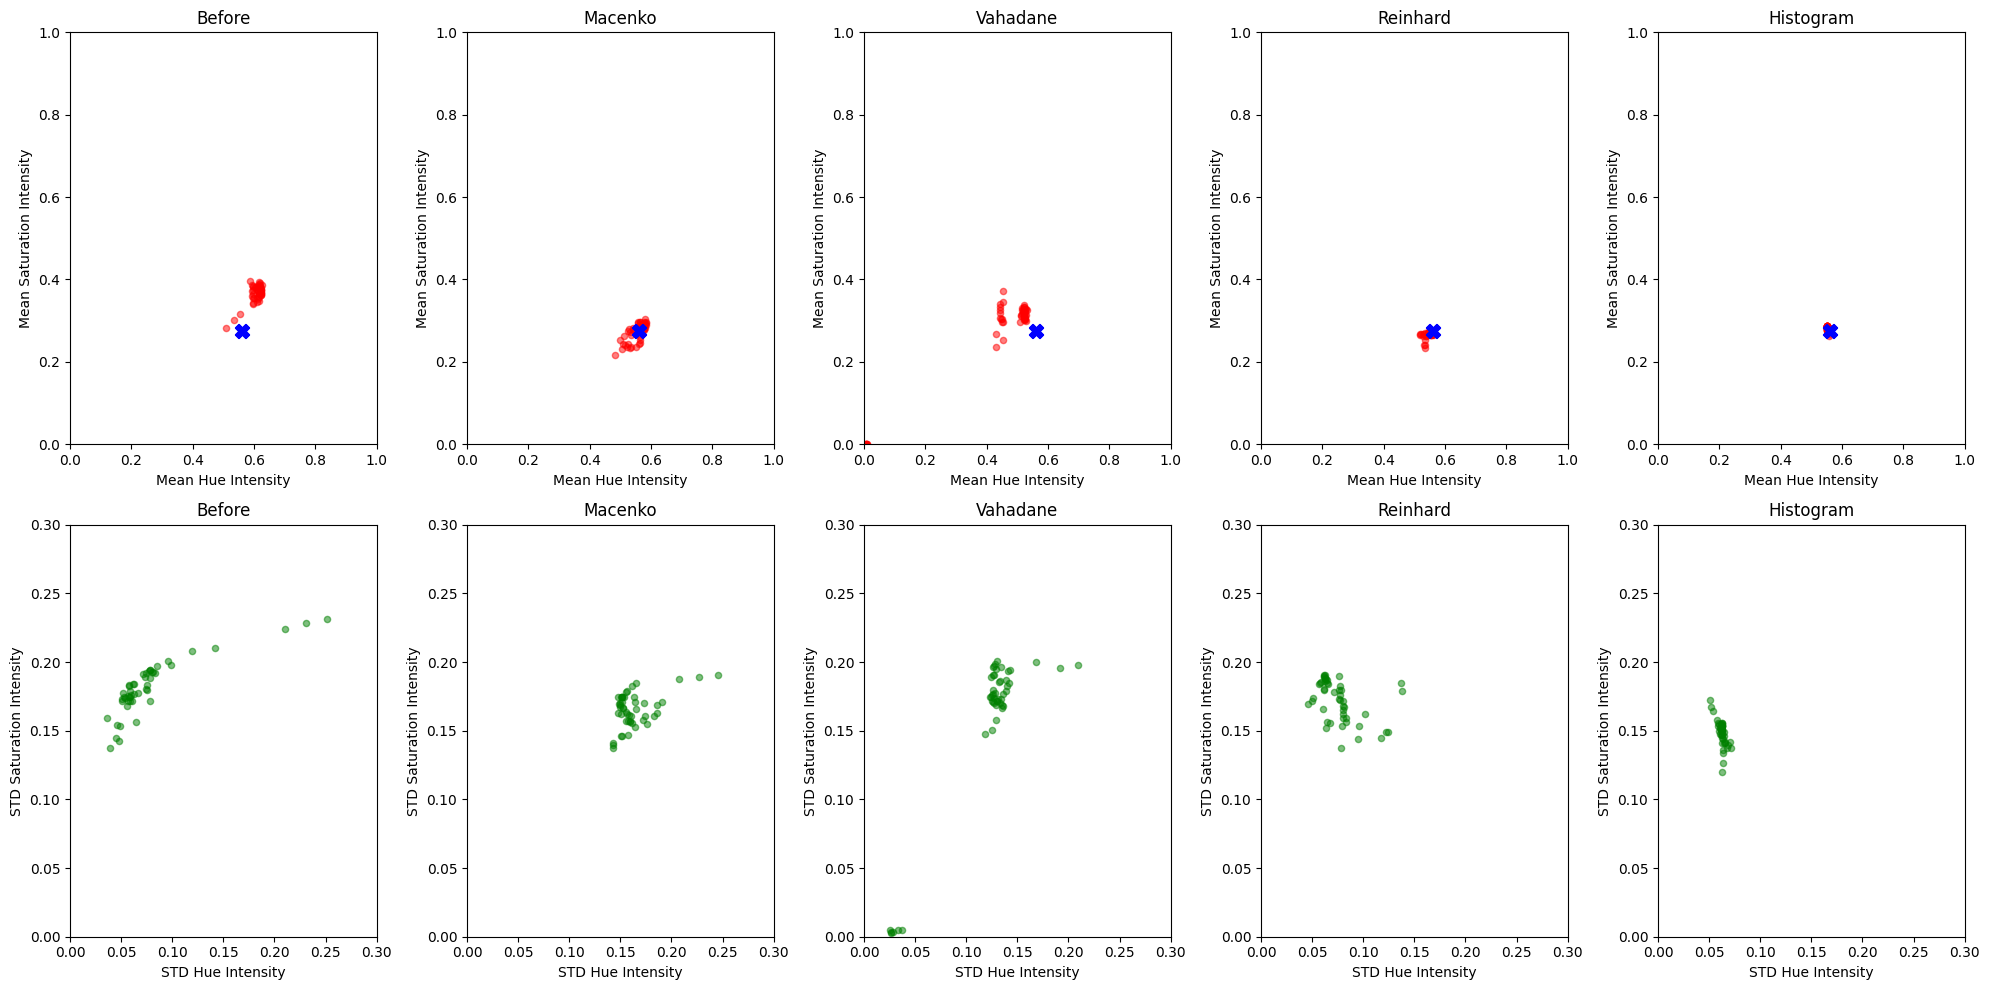

In [3]:
# Plot all in a single grid
color_normalization.plot_all_normalization_comparison(
    original_stats, normalized_stats_list, methods, target_image_path 
)

In [11]:
print(f"All images have been successfully normalized and saved in the selected folder")
print(f"Thank you for using ValidPath2 WSI tool for color normalization!")

All images have been successfully normalized and saved in the selected folder
Thank you for using ValidPath2 WSI tool for color normalization!
